## 1. Merge multiple validation files - to evaluate differences between PhenoTools

In [3]:
import pandas as pd
import os
import re

title = 'Mutations_of_the_aminoacyl‐tRNA‐synthetases_SARS_a'
#title = 'Bi‐allelic_IARS_mutations_in_a_child_with_intra‐ut'
# remove duplicate HPO & line
result_files = os.listdir("results/%s/3_annotations/" % (title))
table_files = [s for s in result_files if ('Validation_' in s)]

df_total = pd.DataFrame()
pheno_list= ['clinphen', 'ncr', 'txt2hpo']
# Validation_performance_clinphen.csv
for index, tab in enumerate(table_files):
    #p = re.compile(r"_([^._]+)\.")
    pheno = pheno_list[index]
    #print(pheno)
    table = pd.read_csv("results/%s/3_annotations/%s" % (title, tab), sep='|', index_col=0)
    table = table.fillna('') # very important to fill na prior to function
    if df_total.empty:
        df_total = table.copy()
        df_total = df_total.add_suffix('_%s'  % (pheno))
        df_total = df_total.rename(columns={'HPO_%s' % (pheno) :'HPO',
                          'NAME_%s' % (pheno):'NAME'})
    else:
        df_total = df_total.merge(table, on=['HPO', 'NAME'],
          suffixes=('_%s' % (pheno_list[index-1]), '_%s' % (pheno_list[index])))
df_total

,HPO,LBL_clinphen,NAME,end_clinphen,hp_id_clinphen,index_clinphen,line_clinphen,names_clinphen,score_clinphen,start_clinphen,LBL_ncr,LBL_txt2hpo
0,HP:0000152,TP,Abnormality of head or neck,,,,,,,,TP,TP
1,HP:0000234,TP,Abnormality of the head,,,,,,,,TP,TP
2,HP:0000240,TP,Abnormality of skull size,,,,,,,,TP,TP
3,HP:0000252,TP,Microcephaly,12,HP:0000252,9,"microcephaly,",['Microcephaly'],1,6,TP,TP
4,HP:0000252,TP,Microcephaly,40,HP:0000252,20,"the patients presented with microcephaly,",['Microcephaly'],1,20,TP,TP
...,...,...,...,...,...,...,...,...,...,...,...,...
100,HP:0007367,FP,Atrophy/Degeneration affecting the central ner...,,,,,,,,FP,FP
101,HP:0011792,FP,Neoplasm by histology,,,,,,,,FP,FP
102,HP:0000764,FP,Peripheral axonal degeneration,,,,,,,,FP,FP
103,HP:0001350,FP,Slurred speech,36,HP:0001350,18,slurred speech) and,['Slurred speech'],1,18,FP,FP


## 2. Error Analysis

In [29]:
import pandas as pd
df_error = pd.read_csv('../results/NCR_ErrorAnalysis_kopajtich_2016.csv', sep=';', encoding='Latin-1', index_col=0)
df_error.head()

,HPO,LBL,NAME,context,end,flags,hp_id,index,line,names,negated,pat_id,relevant,score,section,start,typeOfError,Source
0,HP:0000152,TP,Abnormality of head or neck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HP:0000234,TP,Abnormality of the head,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HP:0000240,TP,Abnormality of skull size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HP:0000252,TP,Microcephaly,Insulin-dependent diabetes mellitus was diagno...,23.0,{'no'},HP:0000252,65.0,She has no microcephaly.,"['Microcephaly', 'Abnormally small cranium', '...",1.0,#85880,1.0,0.943622,Main Text,11.0,NaN,NaN
4,HP:0000252,TP,Microcephaly,Hence it is likely that reduced zinc levels an...,173.0,"{'normal', 'without'}",HP:0000252,143.0,The neurological phenotype in individual #6526...,"['Microcephaly', 'Abnormally small cranium', '...",1.0,#65269,1.0,0.943622,Main Text,161.0,NaN,NaN


## Plot False positives

Text(0, 0.5, '')

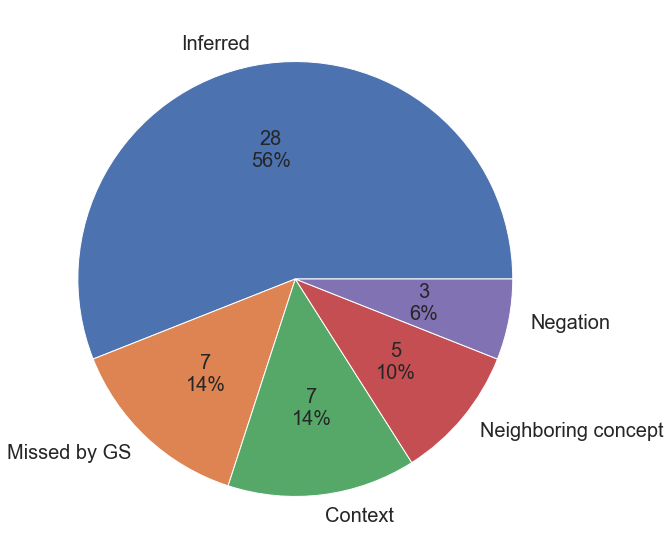

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

def label_function(val):
    return f'{val / 100 * 50:.0f}\n{val:.0f}%'

df_error[((df_error['LBL']=='FP') & (df_error['typeOfError']!='Correct'))]['typeOfError'].value_counts().plot.pie(autopct=label_function, figsize=(10,10), fontsize=20).set_ylabel('')


## Plot False negatives

Text(0, 0.5, '')

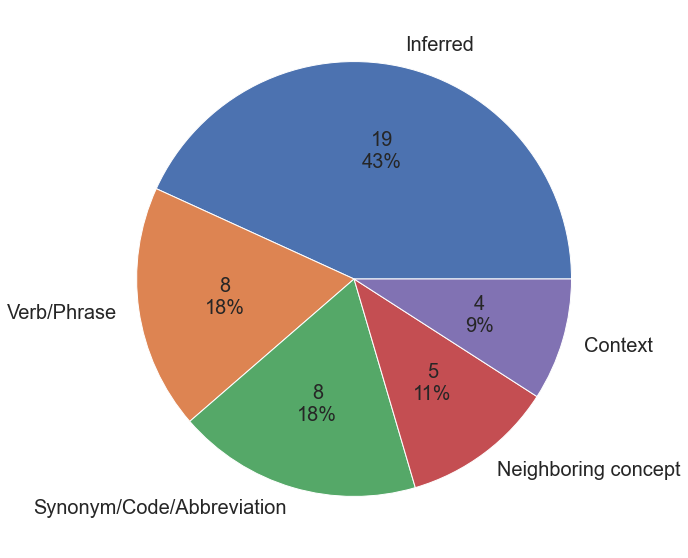

In [51]:
N =len(df_error[df_error['LBL']=='FN'])

def label_function(val):
    return f'{val / 100 * N:.0f}\n{val:.0f}%'

df_error[df_error['LBL']=='FN']['typeOfError'].value_counts().plot.pie(autopct=label_function, figsize=(10,10), fontsize=20).set_ylabel('')

# 3. Boxplot performance PhenoTools

NCR Sens 0.72 +/- 0.05
NCR PPV 0.68 +/- 0.05
NCR F1 0.70 +/- 0.05
Clinphen Sens 0.59 +/- 0.10
Clinphen PPV 0.66 +/- 0.07
Clinphen F1 0.63 +/- 0.08
txt2hpo Sens 0.72 +/- 0.07
txt2hpo PPV 0.67 +/- 0.12
txt2hpo F1 0.68 +/- 0.06


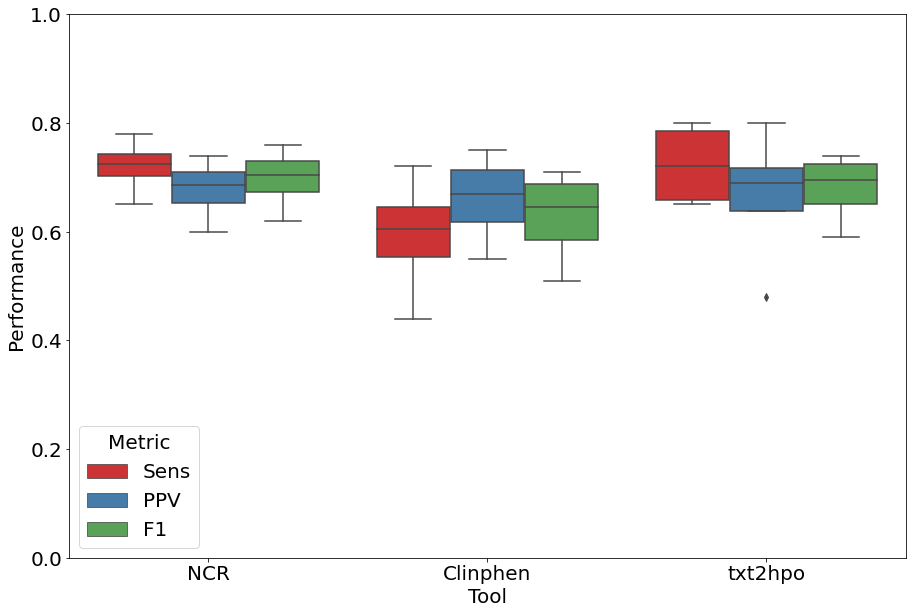

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(15,10))
plt.ylim(0,1)


d_validation = {
'NCR' : {'Sens': [0.65, 0.78, 0.73, 0.72], 'PPV': [0.6, 0.74, 0.7,0.67], 'F1': [0.62, 0.76, 0.72, 0.69]},
'Clinphen' : {'Sens': [0.44, 0.72, 0.59, 0.62], 'PPV': [0.55, 0.7, 0.64, 0.75], 'F1': [0.51, 0.71, 0.61, 0.68]},
'txt2hpo' : {'Sens': [0.78, 0.8, 0.65, 0.66], 'PPV': [0.48,0.69,0.69,0.8], 'F1': [0.59,0.74,0.67,0.72]}}

df = pd.DataFrame(columns=['Tool','Metric', 'Performance'])
ix = 0
for tool in d_validation:
    for metric in d_validation[tool]:
        print(tool, metric, '%.2f +/- %.2f' % (np.mean(d_validation[tool][metric]), np.std(d_validation[tool][metric])))
        for perf in d_validation[tool][metric]: 
            df.loc[ix] = [tool, metric, perf]
            ix += 1

sns.boxplot(x='Tool', y='Performance', hue='Metric', data=df, palette="Set1")
plt.rcParams.update({'font.size': 20})

## F1 before/after

Screening Clinphen 0.57 +/- 0.04
Screening txt2hpo 0.61 +/- 0.04
Screening NCR 0.61 +/- 0.05
Entity Linking Clinphen 0.63 +/- 0.08
Entity Linking txt2hpo 0.68 +/- 0.06
Entity Linking NCR 0.70 +/- 0.05


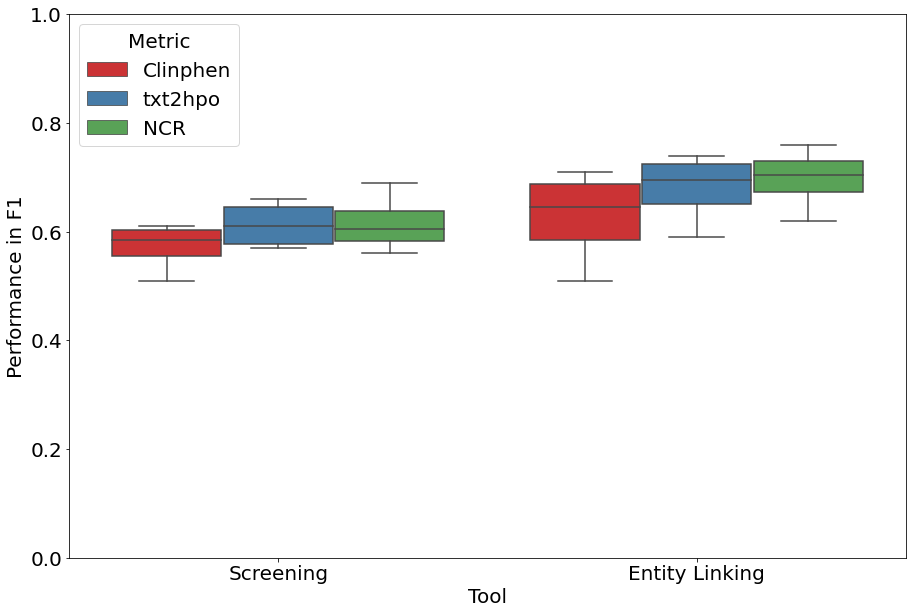

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.figure(figsize=(15,10))
plt.ylim(0,1)


d_validation = {
'Screening' : {'Clinphen': [0.51, 0.57, 0.61, 0.6], 'txt2hpo' : [0.57,0.64,0.66,0.58], 'NCR': [0.56, 0.62, 0.69,0.59]},
'Entity Linking' : {'Clinphen': [0.51, 0.71, 0.61, 0.68], 'txt2hpo' : [0.59,0.74,0.67,0.72], 'NCR':  [0.62, 0.76, 0.72, 0.69]}}

#d_validation = {
#'NCR' : {'Screening': [0.56, 0.62, 0.69,0.59], 'Entity Linking': [0.62, 0.76, 0.72, 0.69]},
#'Clinphen' : {'Screening': [0.51, 0.57, 0.61, 0.6], 'Entity Linking': [0.51, 0.71, 0.61, 0.68]},
#'txt2hpo' : {'Screening': [0.57,0.64,0.66,0.58], 'Entity Linking': [0.59,0.74,0.67,0.72]}}

df = pd.DataFrame(columns=['Tool','Metric', 'Performance in F1'])
#df = pd.DataFrame(columns=['Tool','Metric', 'txt2hpo'])
ix = 0
for tool in d_validation:
    for metric in d_validation[tool]:
        print(tool, metric, '%.2f +/- %.2f' % (np.mean(d_validation[tool][metric]), np.std(d_validation[tool][metric])))
        for perf in d_validation[tool][metric]: 
            df.loc[ix] = [tool, metric, perf]
            ix += 1
            # 

sns.boxplot(x='Tool', y='Performance in F1', hue='Metric', data=df, palette="Set1")
plt.rcParams.update({'font.size': 20})

# 4. Heatmap performance Web scraping + parsing

In [4]:
import pandas as pd
table = pd.read_csv("../results/Top10CaseStudies_Extraction.csv", sep=';',encoding='cp1252')
table

,Journal,Title,Main Text,Table Extraction,Caption Extraction,Table Legend Extraction,Figure Extraction,Supplementary Extraction
0,Medical Mycology Case Reports,COVID-19 associated pulmonary aspergillosis (C...,1,-1,1,-1,1,-1
1,Epilepsy and Behavior Case Reports,Mesial temporal extraventricular neurocytoma (...,1,1,1,0,1,-1
2,Case Reports in Dermatology,Unexpected Presentation of COVID-19 in a 38-Ye...,1,-1,1,-1,1,-1
3,Journal of Dermatological Case Reports,Bullous lichen planus – a review,1,-1,1,-1,1,-1
4,Case Reports in Neurology,Herpes Simplex Virus Type 2 Radiculomyelitis D...,1,-1,1,-1,1,-1
5,Respiratory Medicine Case Reports,A miner with No left lung: Extensive pulmonary...,1,-1,1,-1,1,-1
6,Case Reports in Oncology,A 58-Year-Old Woman with Left-Sided Weakness a...,1,-1,1,-1,1,-1
7,American Journal of Case Reports,Exercise-Induced Sustained Ventricular Tachyca...,1,-1,0,-1,0,-1
8,Journal of Medical Case Reports,Detection of SARS-CoV-2 pneumonia: two case re...,1,0,1,0,1,-1
9,Journal of Radiology Case Reports,Intracranial calcifications on CT: an updated ...,1,-1,1,-1,1,-1


In [8]:
table = table.rename(columns={'Caption Extraction': 'Caption', 'Table Extraction' : 'Table',  'Figure Extraction' : 'Figure', 'Supplementary Extraction' : 'Supplementary', 'Table Legend Extraction' : 'Table Legend'})

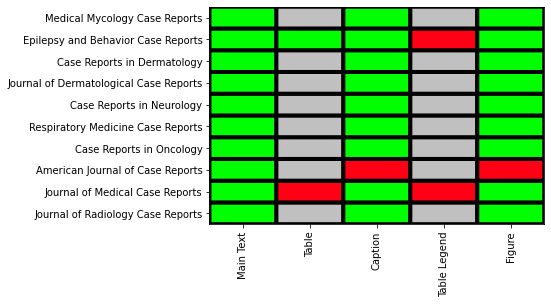

In [10]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.colors as colors 

cols = ['Main Text', 'Table',
       'Caption', 'Table Legend', 'Figure']


discrete_colors = [(192,192,192), (255, 0, 20),  (0,255,0)]
discrete_colors = [(r/255., g/255., b/255.) for r, g, b in discrete_colors]         

my_colormap = colors.ListedColormap(discrete_colors)

plt.pcolor(table[cols][::-1], cmap=my_colormap, edgecolors='k', linewidths=4)
plt.yticks(np.arange(0.5, len(table.index), 1), table['Journal'][::-1])
plt.xticks(np.arange(0.5, len(cols), 1), table[cols], rotation=90)
plt.show()

In [2]:
import re
[m.start() for m in re.finditer('test', 'test test test test')]

[0, 5, 10, 15]

In [3]:
[m.end() for m in re.finditer('test', 'test test test test')]

[4, 9, 14, 19]

In [6]:
[[m.start(), m.end()] for m in re.finditer('test', 'test test test test')]

[[0, 4], [5, 9], [10, 14], [15, 19]]